# Exercise for Graph IV
This notebook implements the conditional graph as described in the exercise.

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [2]:
class AgentState(TypedDict):
    number1: int
    operation: str
    number2: int
    number3: int
    number4: int
    operation2: str
    finalNumber: int
    finalNumber2: int

In [3]:
def add_node(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtract_node(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def add_node2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtract_node2(state: AgentState) -> AgentState:
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

In [4]:
def router(state: AgentState):
    if state['operation'] == '+':
        return 'addition_operation'
    else:
        return 'subtraction_operation'

def router2(state: AgentState):
    if state['operation2'] == '+':
        return 'addition_operation2'
    else:
        return 'subtraction2'

In [5]:
graph = StateGraph(AgentState)
graph.add_node('add_node', add_node)
graph.add_node('subtract_node', subtract_node)
graph.add_node('add_node2', add_node2)
graph.add_node('subtract_node2', subtract_node2)
graph.add_node('router', router)
graph.add_node('router2', router2)

graph.add_edge(START, 'router')
graph.add_conditional_edges('router', lambda state: router(state), {
    'addition_operation': 'add_node',
    'subtraction_operation': 'subtract_node'
})
graph.add_edge('add_node', 'router2')
graph.add_edge('subtract_node', 'router2')
graph.add_conditional_edges('router2', lambda state: router2(state), {
    'addition_operation2': 'add_node2',
    'subtraction2': 'subtract_node2'
})
graph.add_edge('add_node2', END)
graph.add_edge('subtract_node2', END)

app = graph.compile()

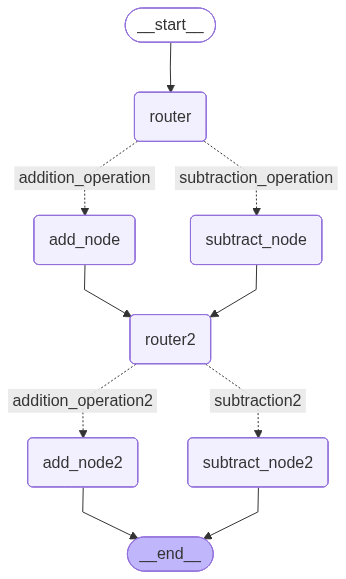

In [6]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [7]:
initial_state = AgentState(number1=10, operation='-', number2=5, number3=7, number4=2, operation2='+', finalNumber=0, finalNumber2=0)
result = app.invoke(initial_state)
print('finalNumber:', result['finalNumber'])
print('finalNumber2:', result['finalNumber2'])

InvalidUpdateError: Expected dict, got subtraction_operation
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE